# GooglePlay Project:

# Group 2


### Name of students:

יאיר עוגן

הוד גיספאן

דניאל חתוכה





<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



<a id="top"></a>
# Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

    2.1 [Checking Values](#checking-Values)
3. [Paid Apps vs Free Apps](#paid-apps-vs-free-apps)

    3.1 [הקשר בין גודל האפליקציה לפופולריות שלה](#הקשר-בין-גודל-האפליקציה-לפופולריות-שלה)

<a id="introduction"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
url = 'https://raw.githubusercontent.com/Yairvedaniel/project1/main/googleplaystore_%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%20%D7%A2%D7%95%D7%92%D7%9F%20%D7%95%D7%93%D7%A0%D7%99%D7%90%D7%9C.csv'
apps = pd.read_csv(url)
apps.head()

Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art & Design;Pretend Play    15-Jan-18               2.0.0   
2       Everyone               Art & Design     1-Aug-18               1.2.4   
3           Teen               Art & Design     8-Jun-18  Varies with device   
4       Everyone    Art & Design;Creativity    20-Jun-18                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
apps.shape

(10841, 14)

In [5]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="data-cleaning-and-preprocessing"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [6]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='checking-Values'></a>
#### 2.1 checking values
[back to top](#top)

בדיקת כפילויות

In [7]:
apps.duplicated().sum()

483

In [8]:

apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלות ערכים חסרים בודדים

In [12]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [13]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [14]:
# apps.replace('Varies with device', np.nan, inplace=True)


הסרת תווים מיוחדים מעמודות מספריות

In [15]:

cols = ['Installs','Price']
chars = ['+',",","$"]
for col in cols:   
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


יצירת עמודה חדשה שבה כל הערכים הם לפי מגה בייט

In [16]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [17]:
apps = apps.drop('Size', axis=1)

In [18]:
Size_MB_filtered = apps.copy()

# החלפת "Varies with device" לערכים חסרים (NaN) בעמודת "Size_MB" במשתנה apps_filtered
Size_MB_filtered['Size_MB'].replace('Varies with device', pd.NA, inplace=True)

# סינון השורות שבהן יש ערכים חסרים בעמודות "Size_MB" ו-"Rating" במשתנה apps_filtered
Size_MB_filtered = Size_MB_filtered.dropna(subset=['Size_MB'])

# הדפסת השורות הראשונות של הנתונים המסוננים
Size_MB_filtered.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs  Type Price Content Rating                     Genres  \
0     159     10000  Free     0       Everyone               Art & Design   
1     967    500000  Free     0       Everyone  Art & Design;Pretend Play   
2   87510   5000000  Free     0       Everyone               Art & Design   
3  215644  50000000  Free     0           Teen               Art & Design   
4     967    100000  Free     0       Everyone    Art & Design;Creativity   

  Last Updated         Current Ver   Android Ver  Size_MB  
0     7-Jan-18               1.0.0  4.0.3 and up     19.0  
1    15-Jan-18               2.0.0  4.0.3 and up     14.0  
2     1-Aug-18               1.2.4  4.0.3 and up      8.7  
3     8-Jun-18  Varies with device    4.2 and up     25.0  
4    20-Jun-18                 1.1    4.4 and up      2.8

In [19]:
missing_data = Size_MB_filtered.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1403
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_MB              0
dtype: int64


In [20]:
Size_MB_filtered.shape

(8814, 13)

In [21]:
Rating_filtered = apps.copy()

# סינון השורות שבהן יש ערכים חסרים בעמודות "Size_MB" ו-"Rating" במשתנה apps_filtered
Rating_filtered = Rating_filtered.dropna(subset=['Rating'])

# הדפסת השורות הראשונות של הנתונים המסוננים
Rating_filtered.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs  Type Price Content Rating                     Genres  \
0     159     10000  Free     0       Everyone               Art & Design   
1     967    500000  Free     0       Everyone  Art & Design;Pretend Play   
2   87510   5000000  Free     0       Everyone               Art & Design   
3  215644  50000000  Free     0           Teen               Art & Design   
4     967    100000  Free     0       Everyone    Art & Design;Creativity   

  Last Updated         Current Ver   Android Ver  Size_MB  
0     7-Jan-18               1.0.0  4.0.3 and up     19.0  
1    15-Jan-18               2.0.0  4.0.3 and up     14.0  
2     1-Aug-18               1.2.4  4.0.3 and up      8.7  
3     8-Jun-18  Varies with device    4.2 and up     25.0  
4    20-Jun-18                 1.1    4.4 and up      2.8

In [22]:
missing_data = Rating_filtered.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating               0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_MB           1467
dtype: int64


In [23]:
Rating_filtered.shape

(8878, 13)

In [24]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
Rating_filtered.Rating = pd.to_numeric(Rating_filtered.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
Size_MB_filtered.Size_MB = pd.to_numeric(Size_MB_filtered.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

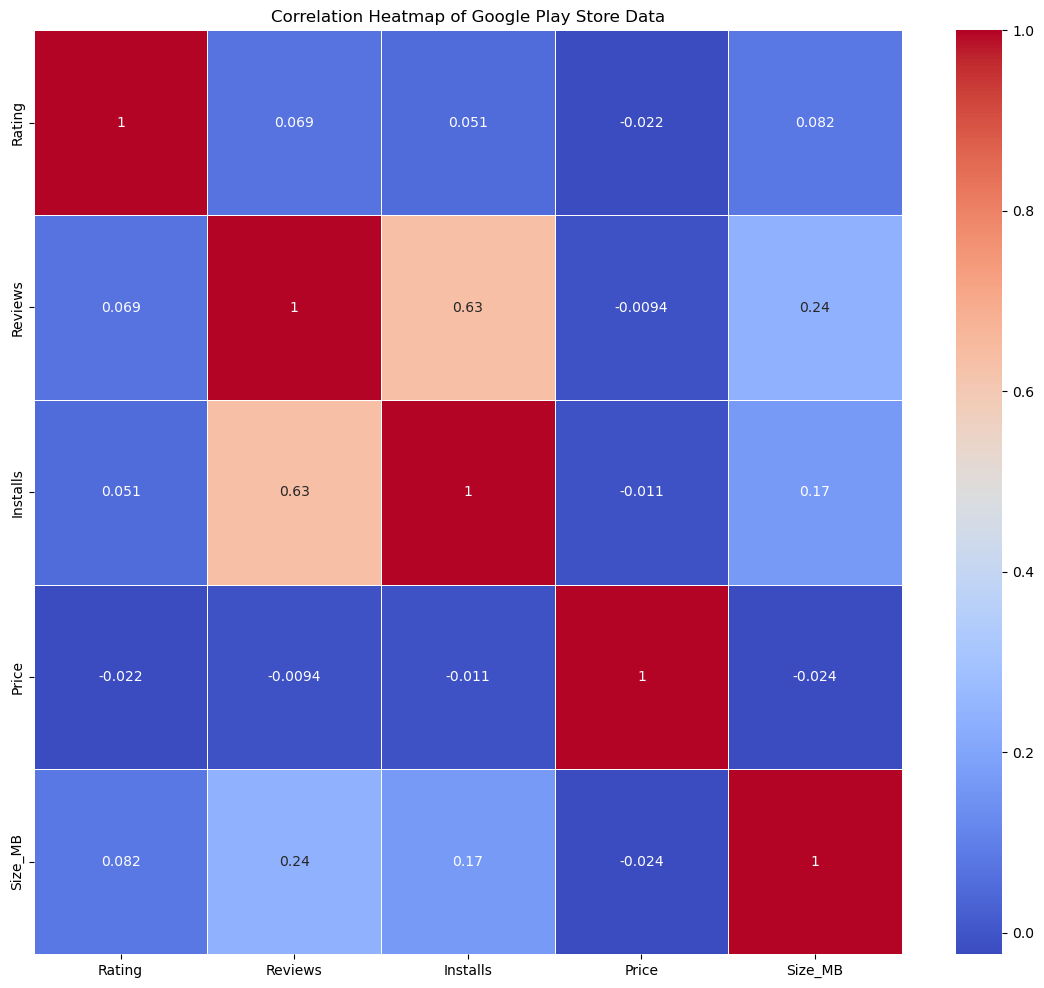

In [25]:
apps_combined = apps.copy()
apps_combined['Size_MB'] = Size_MB_filtered['Size_MB']
apps_combined['Rating'] = Rating_filtered['Rating']

# יצירת heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = apps_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

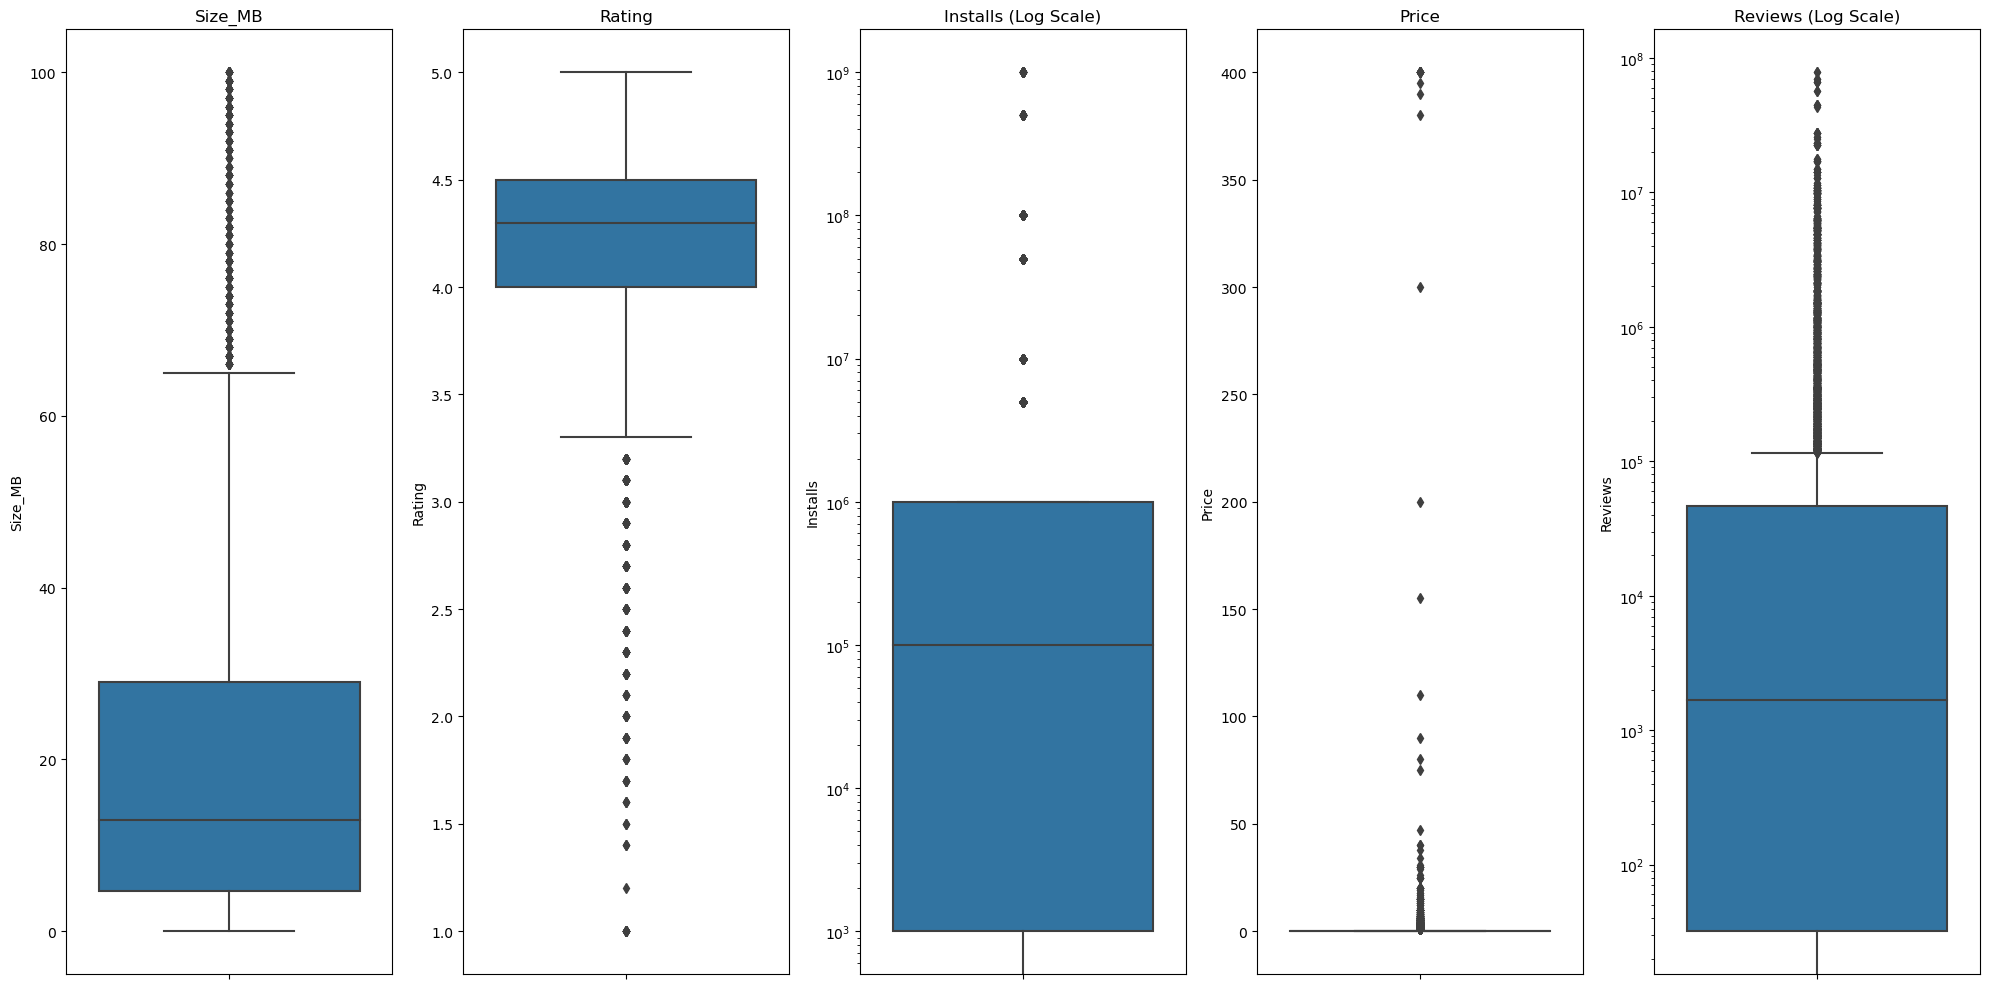

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# קופסא עבור Size_MB
sns.boxplot(data=Size_MB_filtered, y='Size_MB', ax=axes[0])
axes[0].set_title('Size_MB')

# קופסא עבור Rating
sns.boxplot(data=Rating_filtered, y='Rating', ax=axes[1])
axes[1].set_title('Rating')

# קופסא עבור Installs
sns.boxplot(data=apps, y='Installs', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Installs (Log Scale)')

# קופסא עבור Price
sns.boxplot(data=apps, y='Price', ax=axes[3])
axes[3].set_title('Price')

# קופסא עבור Reviews
sns.boxplot(data=apps, y='Reviews', ax=axes[4])
axes[4].set_yscale('log')
axes[4].set_title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

<a id="paid-apps-vs-free-apps"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

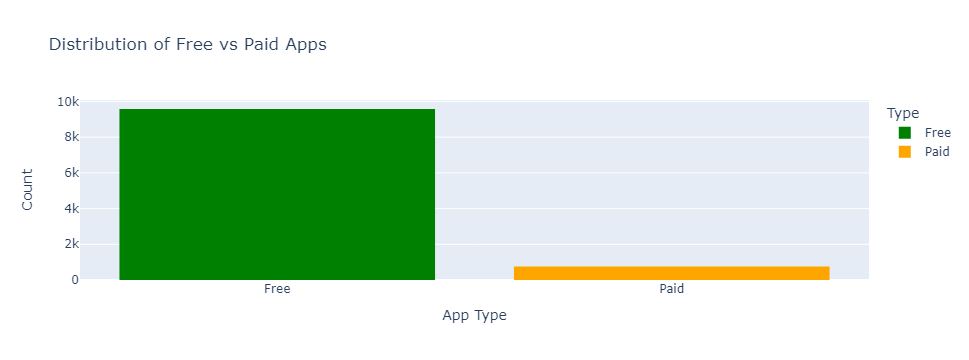

In [27]:
fig = px.histogram(apps, x='Type', color='Type', color_discrete_map={'Free': 'green', 'Paid': 'orange'}, title='Distribution of Free vs Paid Apps')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Count'
)

# הצגת הגרף
fig.show()

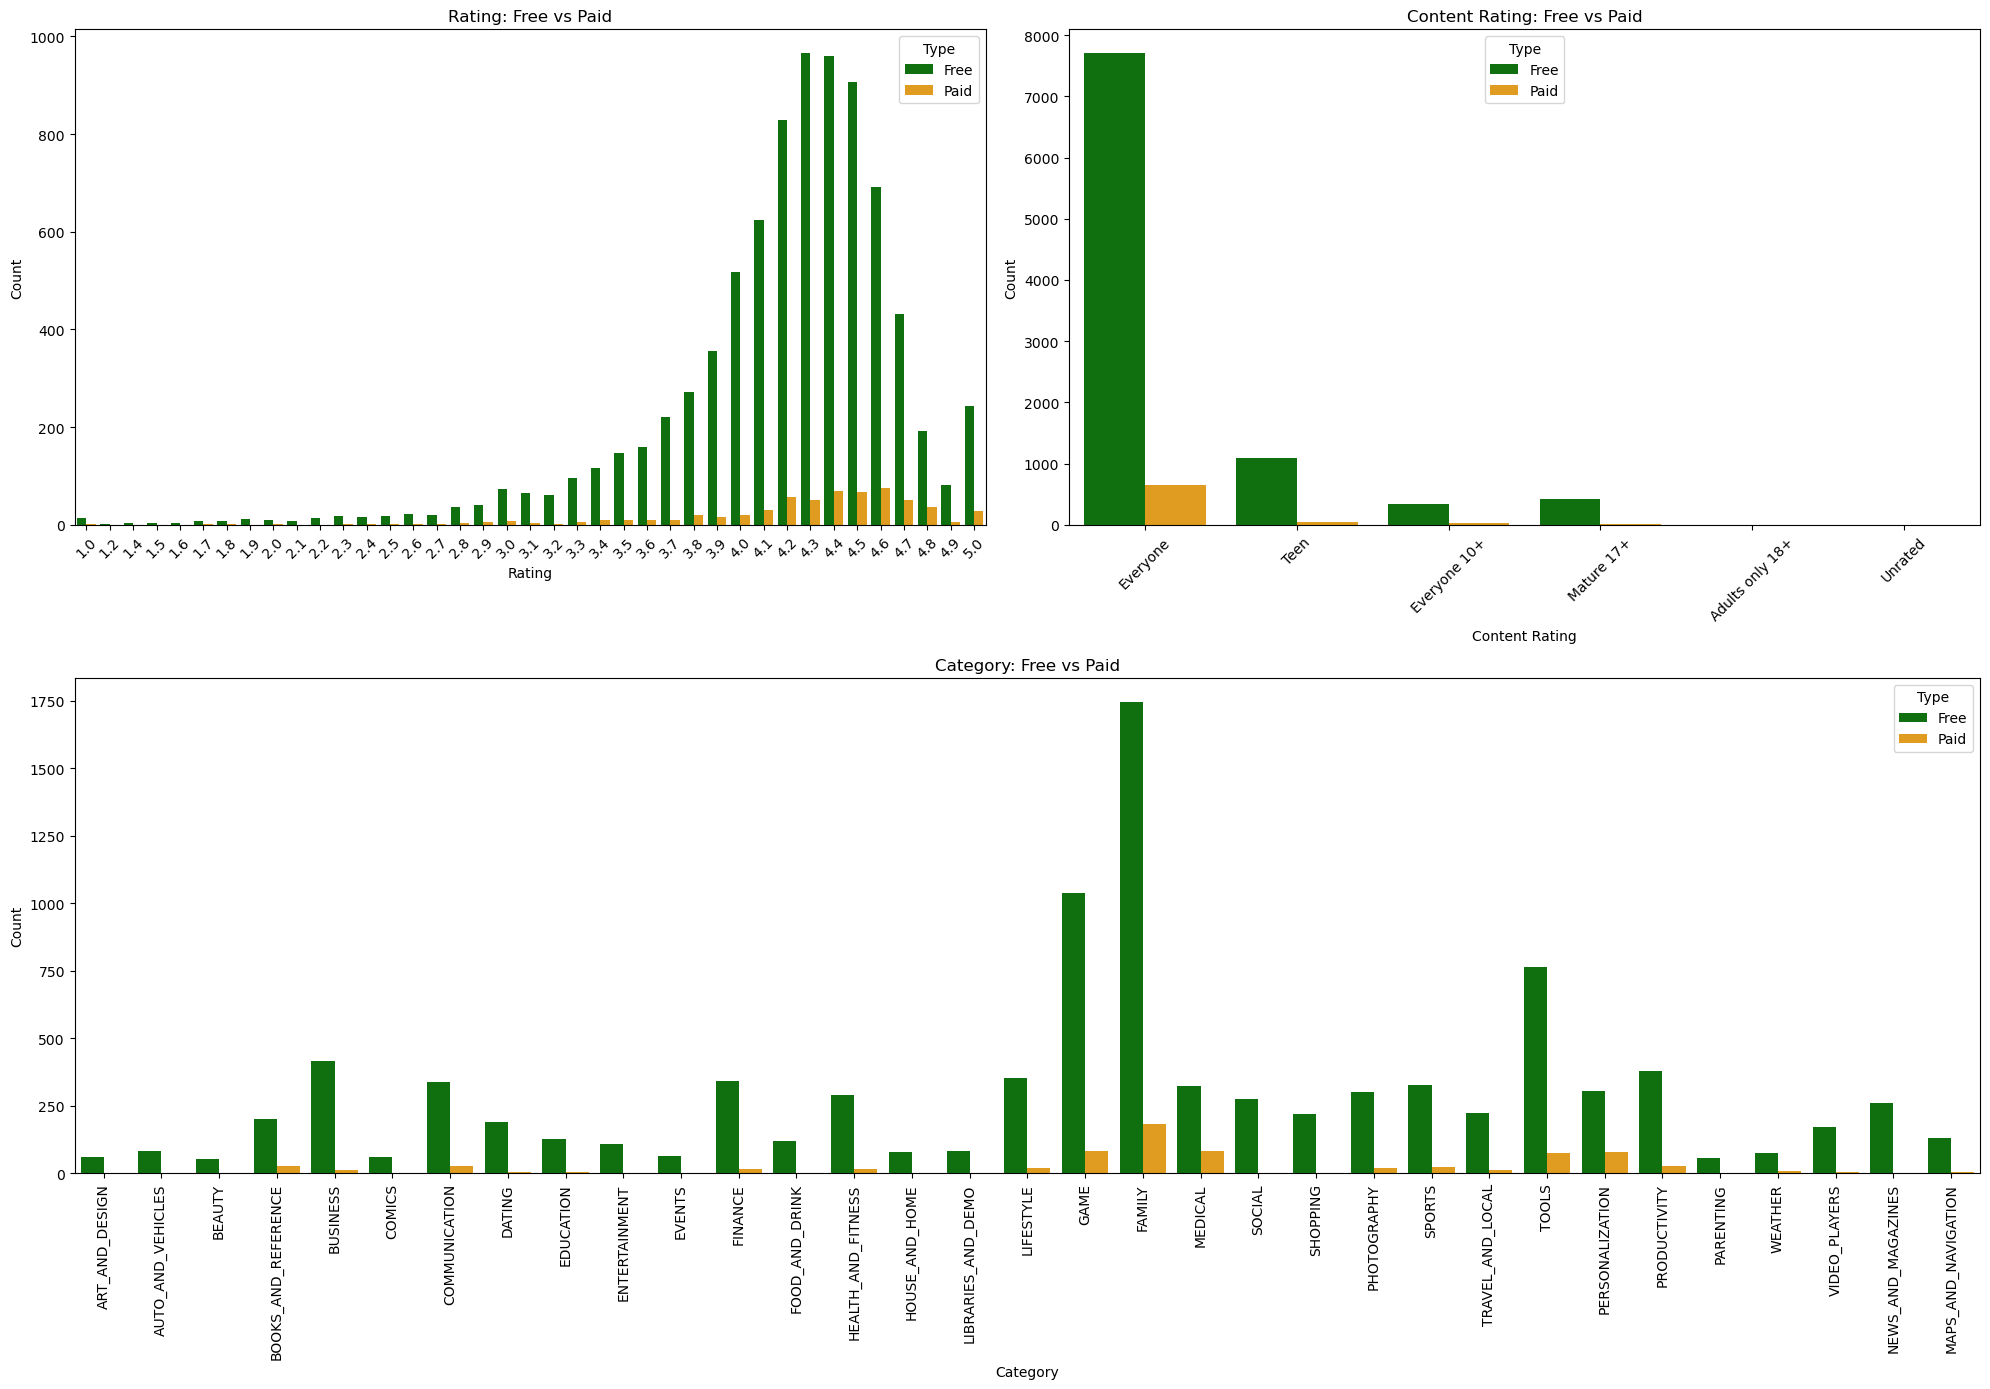

In [28]:
palette = {'Free': 'green', 'Paid': 'orange'}

# הגדרת גודל התרשים והגריד
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# יצירת הגרפים
sns.countplot(x='Rating', hue='Type', data=Rating_filtered, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

# סיבוב התוויות של ציר ה-X
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

# התאמת המרווחים בין התרשימים
plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

### נתרכז יותר בהבדל בין דירוגי וביקורות האפליקציה

In [29]:
average_rating_paid = Rating_filtered[Rating_filtered['Type'] == 'Paid']['Rating'].mean()
average_rating_free = Rating_filtered[Rating_filtered['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.26
The average rating of free apps is: 4.18


ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן גבוה אפליקציות בתשלום.

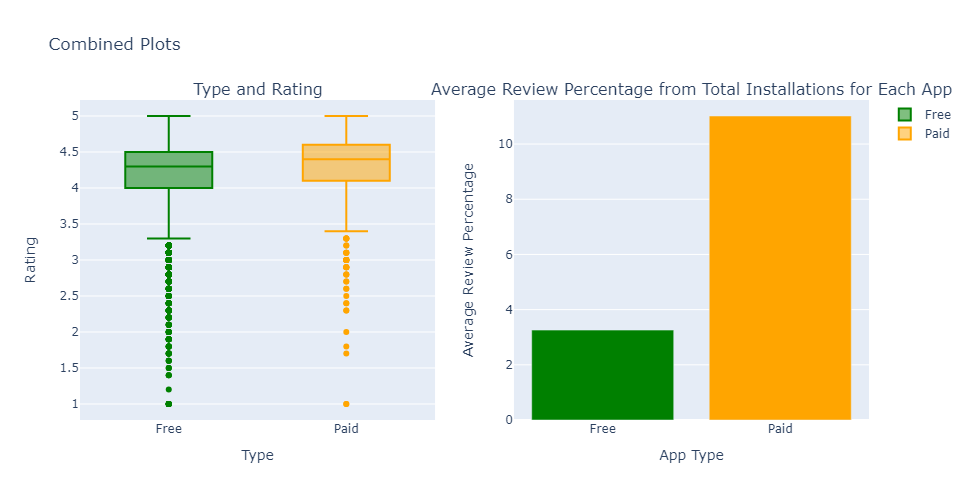

In [30]:
apps['Review_Percentage'] = (apps['Reviews'] / apps['Installs']) * 100

# הסרת ערכים לא חוקיים בעמודת 'Review_Percentage'
apps = apps.dropna(subset=['Review_Percentage'])
apps = apps[apps['Review_Percentage'].apply(lambda x: isinstance(x, (int, float)))]

# חישוב אחוז ביקורות ממוצע לפי סוג האפליקציה
average_review_percentage_df = apps.groupby('Type')['Review_Percentage'].mean().reset_index()
average_review_percentage_df.columns = ['Type', 'Average Review Percentage']

# יצירת תת-עלילות
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Type and Rating',
    'Average Review Percentage from Total Installations for Each App'
))

# הוספת עלילה ראשונה לעמודה הראשונה
fig.add_trace(go.Box(
    y=Rating_filtered['Rating'][Rating_filtered['Type'] == 'Free'],
    name='Free',
    marker_color='green',
    legendgroup='Type'
), row=1, col=1)
fig.add_trace(go.Box(
    y=Rating_filtered['Rating'][Rating_filtered['Type'] == 'Paid'],
    name='Paid',
    marker_color='orange',
    legendgroup='Type'
), row=1, col=1)

# הוספת עלילה שנייה לעמודה השנייה
fig.add_trace(go.Bar(
    x=average_review_percentage_df['Type'],
    y=average_review_percentage_df['Average Review Percentage'],
    marker_color=['green', 'orange'],
    showlegend=False
), row=1, col=2)

# עדכון פריסת העלילות
fig.update_layout(height=500, width=900, title_text='Combined Plots', showlegend=True)

# עדכון צירי ה-x וה-y
fig.update_xaxes(title_text='Type', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=1)

fig.update_xaxes(title_text='App Type', row=1, col=2)
fig.update_yaxes(title_text='Average Review Percentage', row=1, col=2)

# עדכון האגדה
fig.update_layout(
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# הצגת העלילות המשלבות
fig.show()

### תובנה 1:


ניתן לראות כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

נוסף על כך, הדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות

לסיכום, קיימת מעורבות רבה יותר מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק דירוגים גבוהים יותר לאפליקציות אלה. 

<a id="הקשר-בין-גודל-האפליקציה-לפופולריות-שלה"></a>
## 3.1 :הקשר בין גודל האפליקציה לפופולריות שלה

[back to top](#top)


In [31]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

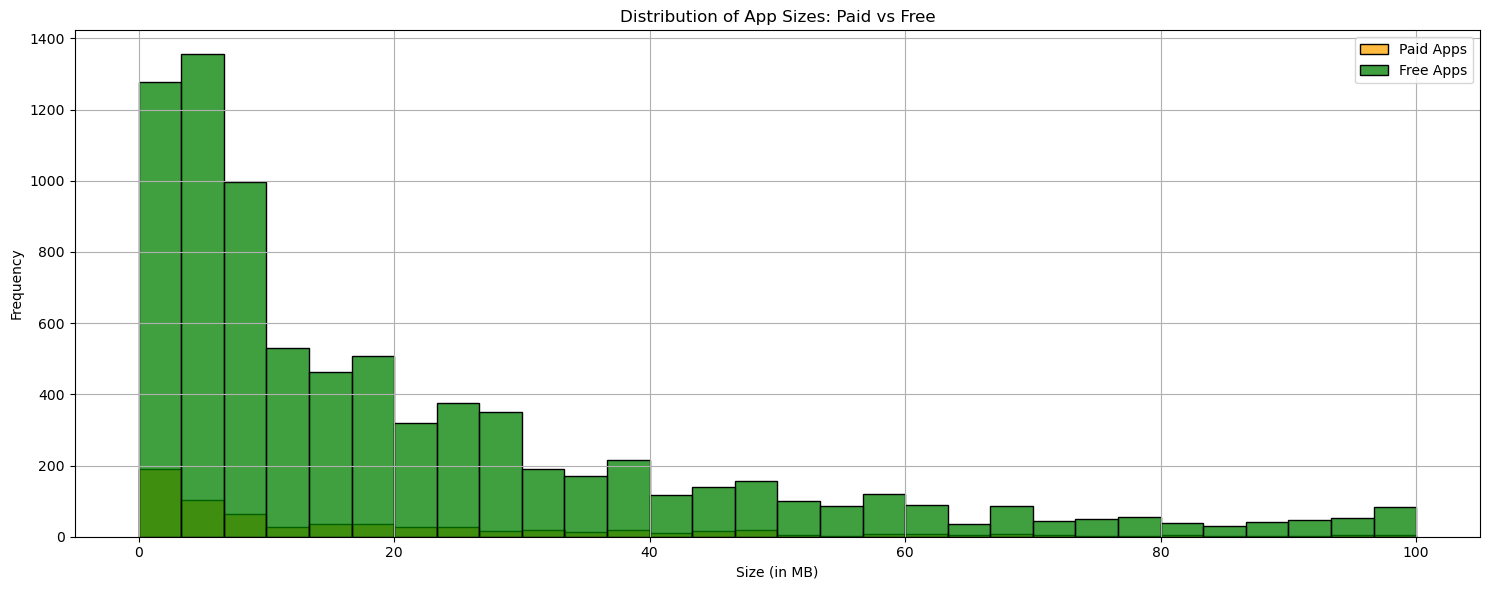

In [32]:
paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# התפלגות גדלי האפליקציות בתשלום בהשוואה לחינמיות
plt.figure(figsize=(15, 6))
sns.histplot(paid_apps['Size_MB'], color='orange', label='Paid Apps', bins=30)
sns.histplot(free_apps['Size_MB'], color='green', label='Free Apps', bins=30)
plt.title('Distribution of App Sizes: Paid vs Free')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

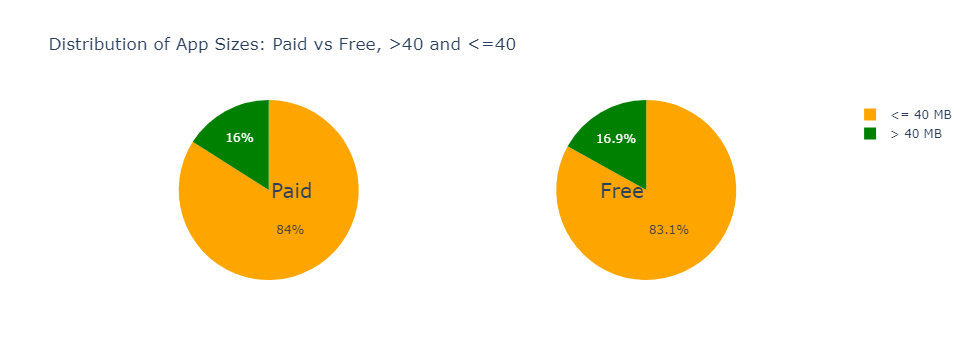

In [33]:
paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# חישוב מספר האפליקציות לפי קטגוריות גודל
size_counts = {
    'Paid': [paid_apps[paid_apps['Size_MB'] <= 40].shape[0], paid_apps[paid_apps['Size_MB'] > 40].shape[0]],
    'Free': [free_apps[free_apps['Size_MB'] <= 40].shape[0], free_apps[free_apps['Size_MB'] > 40].shape[0]]
}

# יצירת גרף עוגה באמצעות Plotly
fig = go.Figure()
for i, (app_type, counts) in enumerate(size_counts.items()):
    fig.add_trace(go.Pie(labels=['<= 40 MB', '> 40 MB'], values=counts, name=app_type,
                         marker_colors=['orange', 'green'], domain={'x': [i*0.5, (i+1)*0.5]}))

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Distribution of App Sizes: Paid vs Free, >40 and <=40',
                  annotations=[dict(text=key, x=(i*0.5 + (i+1)*0.5)/2, y=0.5, font_size=20, showarrow=False)
                               for i, key in enumerate(size_counts.keys())])

# הצגת הגרף
fig.show()

ניתן לראות באופן ברור כי קרוב ל84% מסך האפליקציות הם בעלות גודל יחסית קטן.

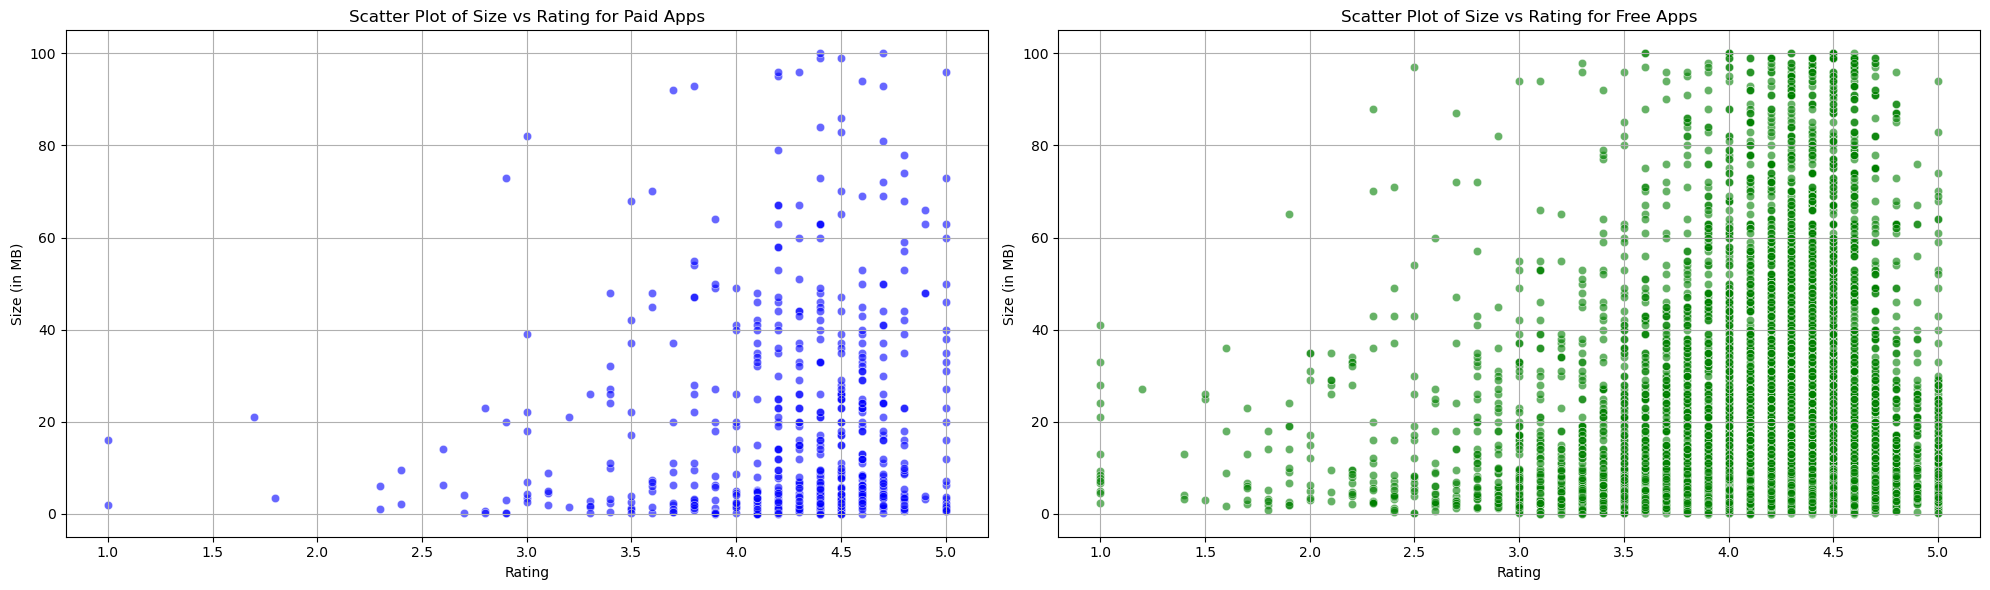

In [34]:
paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# גרף פיזור של גודל מול דירוג עבור אפליקציות בתשלום וחינמיות
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=Rating_filtered[Rating_filtered['Type'] == 'Paid'], x='Rating', y='Size_MB', color='blue', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(data=Rating_filtered[Rating_filtered['Type'] == 'Free'], x='Rating', y='Size_MB', color='green', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Free Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.tight_layout()
plt.show()

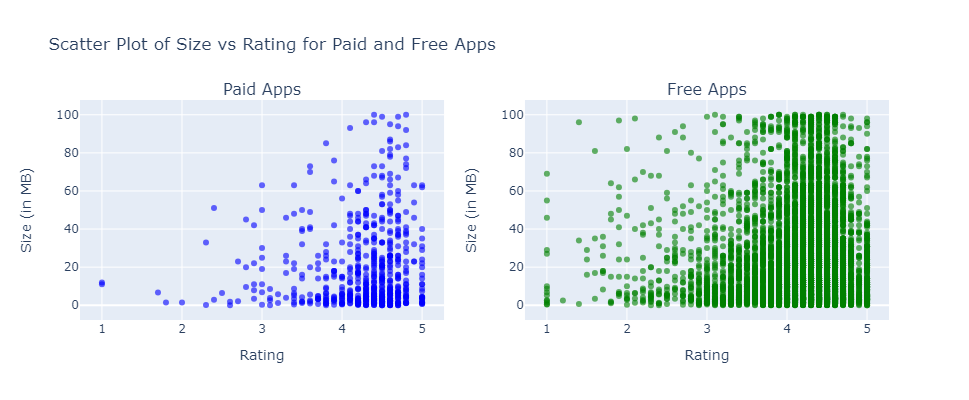

In [35]:
paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# יצירת גרפים כפולים עם Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Paid Apps", "Free Apps"))

# גרף פיזור עבור אפליקציות בתשלום
scatter_paid = go.Scatter(x=Rating_filtered[Rating_filtered['Type'] == 'Paid']['Rating'], y=paid_apps['Size_MB'], mode='markers',
                          marker=dict(color='blue', opacity=0.6), name='Paid Apps')
fig.add_trace(scatter_paid, row=1, col=1)

# גרף פיזור עבור אפליקציות חינמיות
scatter_free = go.Scatter(x=Rating_filtered[Rating_filtered['Type'] == 'Free']['Rating'], y=free_apps['Size_MB'], mode='markers',
                          marker=dict(color='green', opacity=0.6), name='Free Apps')
fig.add_trace(scatter_free, row=1, col=2)

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Scatter Plot of Size vs Rating for Paid and Free Apps',
                  width=1000, height=400, showlegend=False)

# הגדרת שמות צירים לכל גרף בנפרד
fig.update_xaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=1)

fig.update_xaxes(title_text='Rating', row=1, col=2)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=2)

# הצגת הגרף
fig.show()

### תובנה 2:

רוב האפליקציות הן בעלות גודל קטן הן בתשלום והן בחינם. אם נתמקד באפליקציות בתשלום, ניתן לראות באופן ברור וחד יותר כי ישנה העדפת משתמש לאפליקציות **קלות משקל**. ע"פ דירוג המשתמשים ניתן לראות כי אפליקציה בתשלום שהיא כבדה עשויה שלא להצליח בשוק.



# הקשר בין הקטגוריה

Number of categories =  33


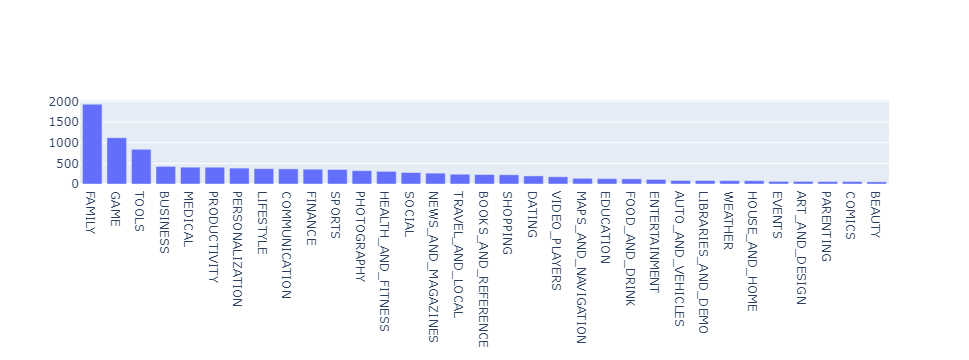

In [36]:

num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)


num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

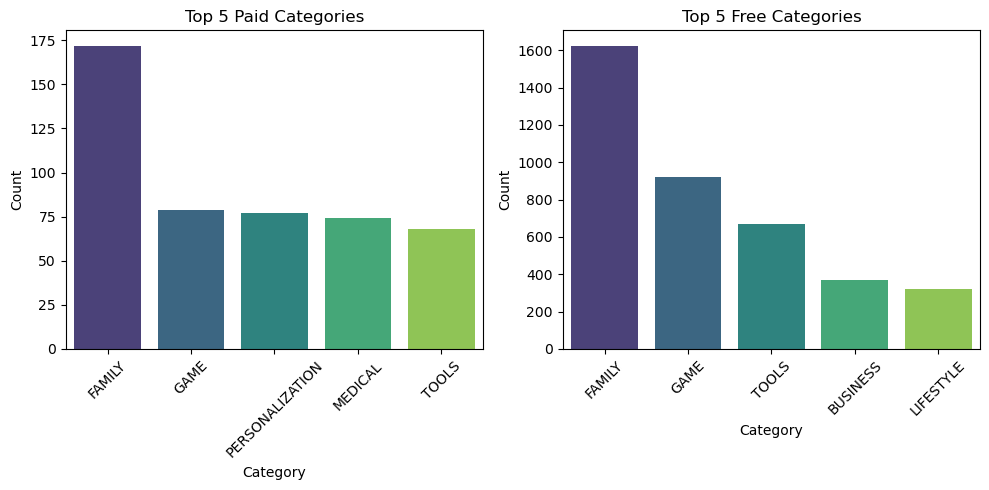

In [37]:

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(10, 5))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# מציאת 5 הקטגוריות הנפוצות ביותר עבור אפליקציות בתשלום וחינמיות
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# סינון הנתונים ל-5 הקטגוריות הנפוצות ביותר
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# חישוב ממוצע התקנות לפי קטגוריה עבור אפליקציות חינמיות
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# חישוב ממוצע התקנות לפי קטגוריה עבור אפליקציות בתשלום
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# פילטור הערכים החיוביים עבור הסקלה הלוגריתמית
top_5_free_installs_avg = top_5_free_installs_avg[top_5_free_installs_avg['Installs'] > 0]
top_5_paid_installs_avg = top_5_paid_installs_avg[top_5_paid_installs_avg['Installs'] > 0]

# יצירת תת-עלילות
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# גרף קטגוריות חינמיות מובילות לפי ספירה
sns.countplot(data=free_apps_top_5, x='Category', order=top_5_free_categories, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 5 Free Categories by Count')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# גרף קטגוריות בתשלום מובילות לפי ספירה
sns.countplot(data=paid_apps_top_5, x='Category', order=top_5_paid_categories, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Top 5 Paid Categories by Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# גרף קטגוריות חינמיות מובילות לפי ממוצע התקנות בקנה מידה לוגריתמי
sns.barplot(data=top_5_free_installs_avg, x='Category', y='Installs', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 5 Free Categories by Average Installs (Log scale)')
axes[1, 0].set_ylabel('Average Installs per App')
axes[1, 0].set_yscale('log')
axes[1, 0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 0].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# גרף קטגוריות בתשלום מובילות לפי ממוצע התקנות בקנה מידה לוגריתמי
sns.barplot(data=top_5_paid_installs_avg, x='Category', y='Installs', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 5 Paid Categories by Average Installs (Log scale)')
axes[1, 1].set_ylabel('Average Installs per App')
axes[1, 1].set_yscale('log')
axes[1, 1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# התאמת המרווחים בין התרשימים
plt.tight_layout()
plt.show()

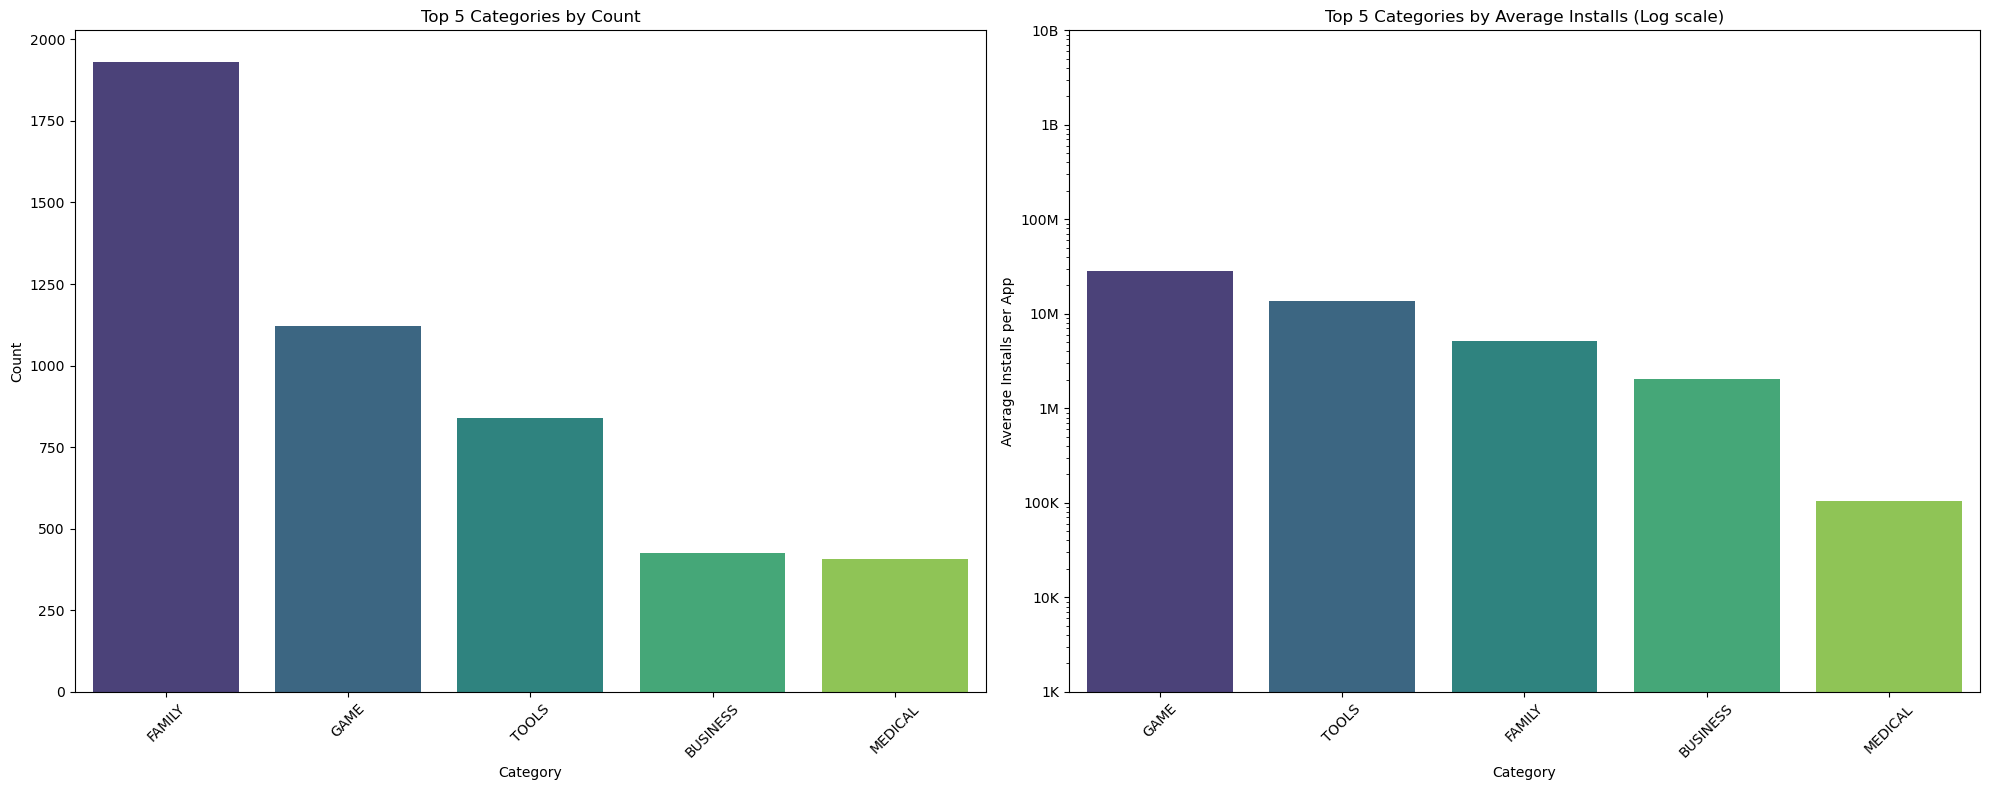

In [38]:
top_5_categories = apps['Category'].value_counts().head(5).index

# סינון הנתונים ל-5 הקטגוריות הנפוצות ביותר
apps_top_5 = apps[apps['Category'].isin(top_5_categories)]

# חישוב ממוצע התקנות לפי קטגוריה
installs_avg = apps.groupby('Category')['Installs'].mean().reset_index()
top_5_installs_avg = installs_avg[installs_avg['Category'].isin(top_5_categories)].sort_values(by='Installs', ascending=False)

# פילטור הערכים החיוביים עבור הסקלה הלוגריתמית
top_5_installs_avg = top_5_installs_avg[top_5_installs_avg['Installs'] > 0]

# יצירת תת-עלילות
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# גרף קטגוריות מובילות לפי ספירה
sns.countplot(data=apps_top_5, x='Category', order=top_5_categories, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Categories by Count')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# גרף קטגוריות מובילות לפי ממוצע התקנות בקנה מידה לוגריתמי
sns.barplot(data=top_5_installs_avg, x='Category', y='Installs', ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 Categories by Average Installs (Log scale)')
axes[1].set_ylabel('Average Installs per App')
axes[1].set_yscale('log')
axes[1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# התאמת המרווחים בין התרשימים
plt.tight_layout()
plt.show()

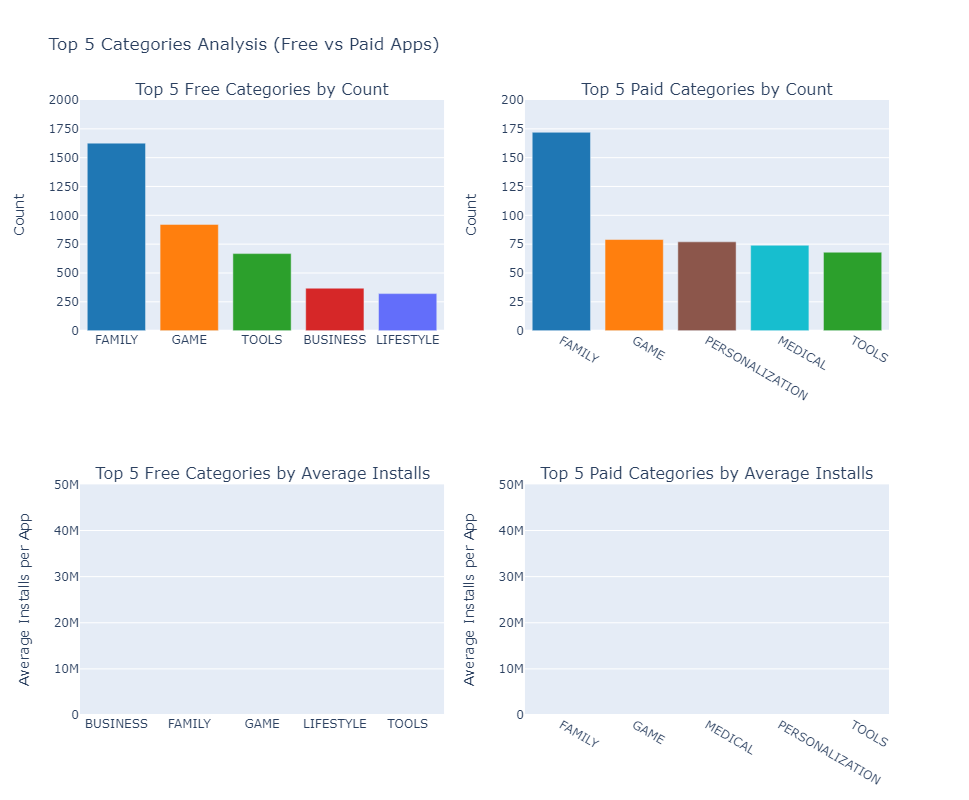

In [39]:
paid_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Paid']
free_apps = Size_MB_filtered[Size_MB_filtered['Type'] == 'Free']

# מציאת 5 הקטגוריות הנפוצות ביותר עבור אפליקציות בתשלום וחינמיות
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# סינון הנתונים ל-5 הקטגוריות הנפוצות ביותר
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# חישוב ממוצע התקנות לפי קטגוריה עבור אפליקציות חינמיות
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# חישוב ממוצע התקנות לפי קטגוריה עבור אפליקציות בתשלום
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# הגדרת צבעים עבור הקטגוריות
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# הוספת צבע ברירת מחדל עבור קטגוריות שלא קיימות במילון
default_color = '#636efa'

# מיפוי צבעים לקטגוריות
free_colors = [category_colors.get(category, default_color) for category in top_5_free_categories]
paid_colors = [category_colors.get(category, default_color) for category in top_5_paid_categories]

# יצירת תת-עלילות
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs', 
    'Top 5 Paid Categories by Average Installs'
))

# הוספת גרף בר עבור קטגוריות חינמיות מובילות לפי ספירה
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# הוספת גרף בר עבור קטגוריות בתשלום מובילות לפי ספירה
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# הוספת גרף בר עבור קטגוריות חינמיות מובילות לפי ממוצע התקנות
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# הוספת גרף בר עבור קטגוריות בתשלום מובילות לפי ממוצע התקנות
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)

# עדכון צירי ה-y עבור השורה הראשונה
fig.update_yaxes(title_text='Count', range=[0, 2000], dtick=250, row=1, col=1)
fig.update_yaxes(title_text='Count', range=[0, 200], dtick=25, row=1, col=2)

# עדכון צירי ה-y עבור השורה השנייה
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e7], row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e7], row=2, col=2)

# הצגת הגרף
fig.show()

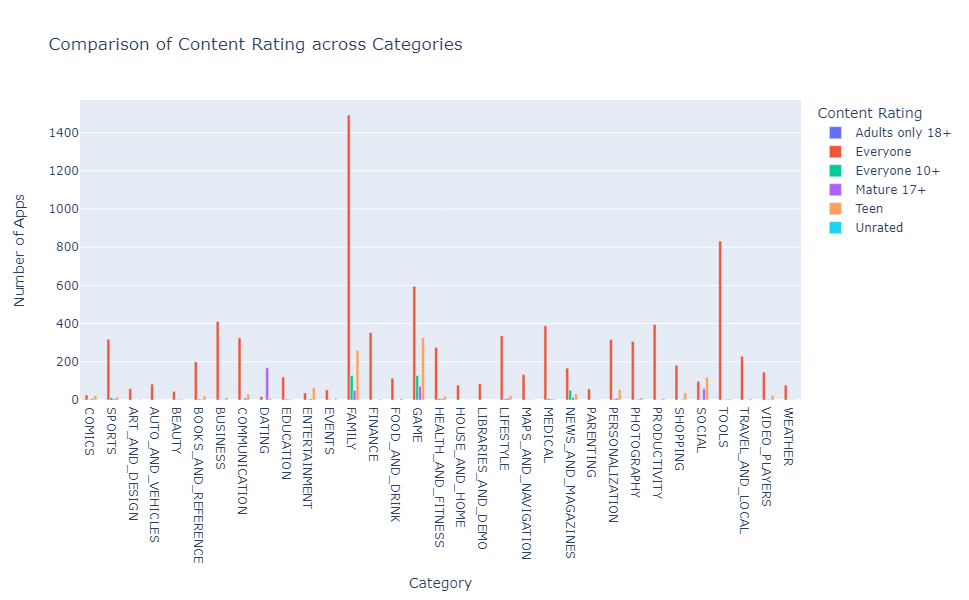

In [40]:
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# יצירת גרף בר להשוואת דירוגי תוכן בין קטגוריות
fig = px.bar(content_rating_analysis, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# עדכון פריסת הגרף לקריאות טובה יותר
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# הצגת הגרף
fig.show()

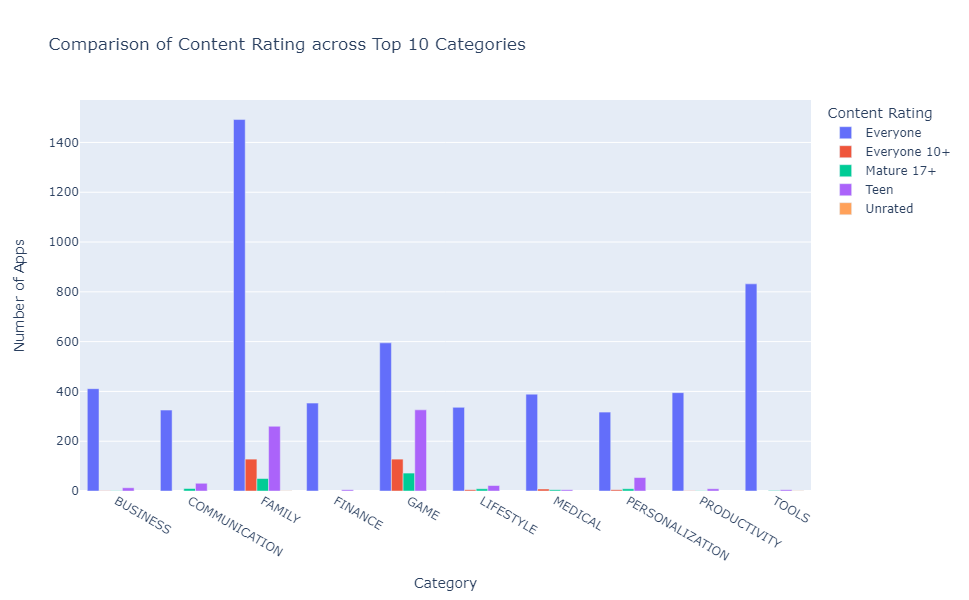

In [41]:
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# קבלת 10 הקטגוריות המובילות לפי מספר האפליקציות הכולל
top_categories = apps['Category'].value_counts().nlargest(10).index

# סינון המסגרת נתונים לכלול רק את 10 הקטגוריות המובילות
content_rating_analysis_top = content_rating_analysis[content_rating_analysis['Category'].isin(top_categories)]

# יצירת גרף בר להשוואת דירוגי תוכן בין 10 הקטגוריות המובילות
fig = px.bar(content_rating_analysis_top, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Top 10 Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# עדכון פריסת הגרף לקריאות טובה יותר
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# הצגת הגרף
fig.show()

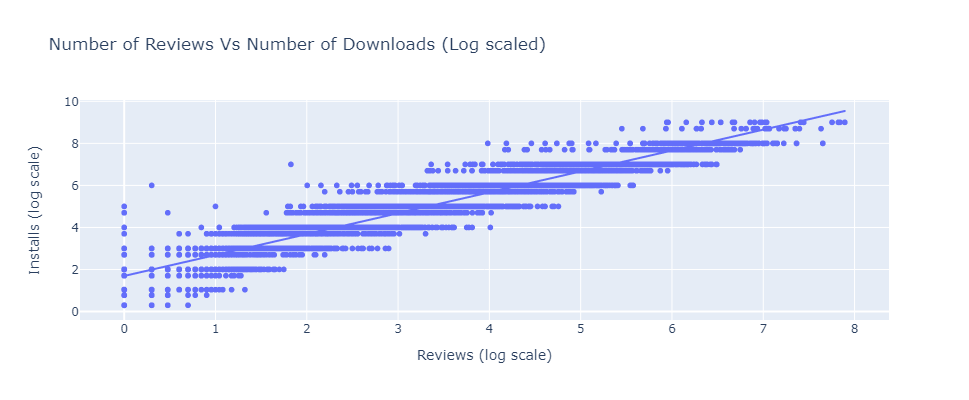

In [42]:
apps['Reviews_log'] = np.log10(apps['Reviews'] + 1)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# יצירת גרף פיזור עם ערכים מומרי לוגריתם
fig = px.scatter(apps, x='Reviews_log', y='Installs_log', trendline='ols',
                 title='Number of Reviews Vs Number of Downloads (Log scaled)',
                 labels={'Reviews_log': 'Reviews (log scale)', 'Installs_log': 'Installs (log scale)'})

fig.update_layout(width=600, height=400)

# הצגת הגרף
fig.show()

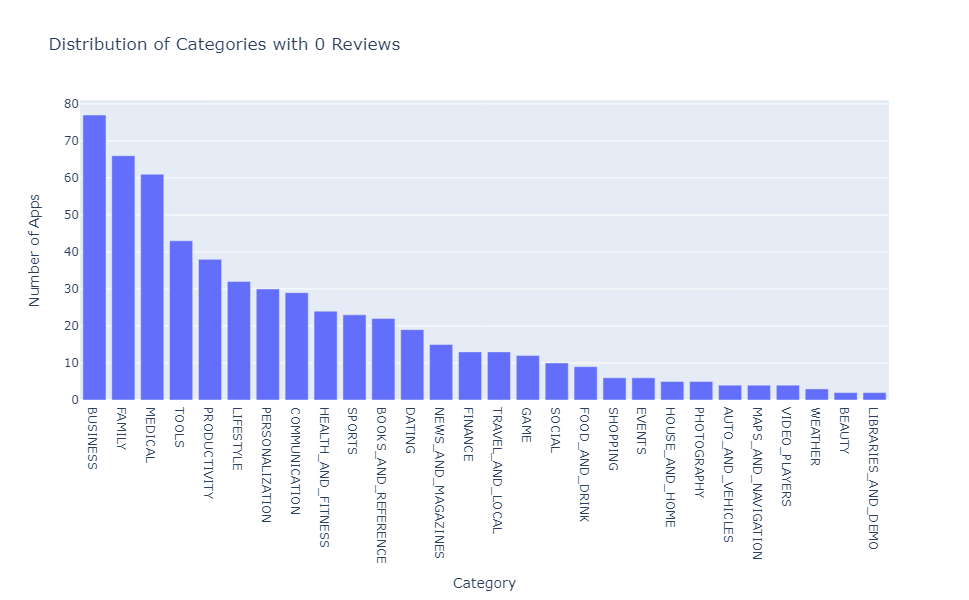

In [43]:
zero_reviews_apps = apps[apps['Reviews'] == 0]

# יצירת מסגרת נתונים להתפלגות הקטגוריות עם 0 ביקורות
zero_reviews_distribution = zero_reviews_apps['Category'].value_counts().reset_index()
zero_reviews_distribution.columns = ['Category', 'Count']

# יצירת גרף בר להראות את התפלגות הקטגוריות עם 0 ביקורות
fig = px.bar(zero_reviews_distribution, 
             x='Category', 
             y='Count', 
             title='Distribution of Categories with 0 Reviews',
             labels={'Count': 'Number of Apps', 'Category': 'Category'},
             height=600)

# עדכון פריסת הגרף לקריאות טובה יותר
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Category',
                  width=800, height=600)

# הצגת הגרף
fig.show()

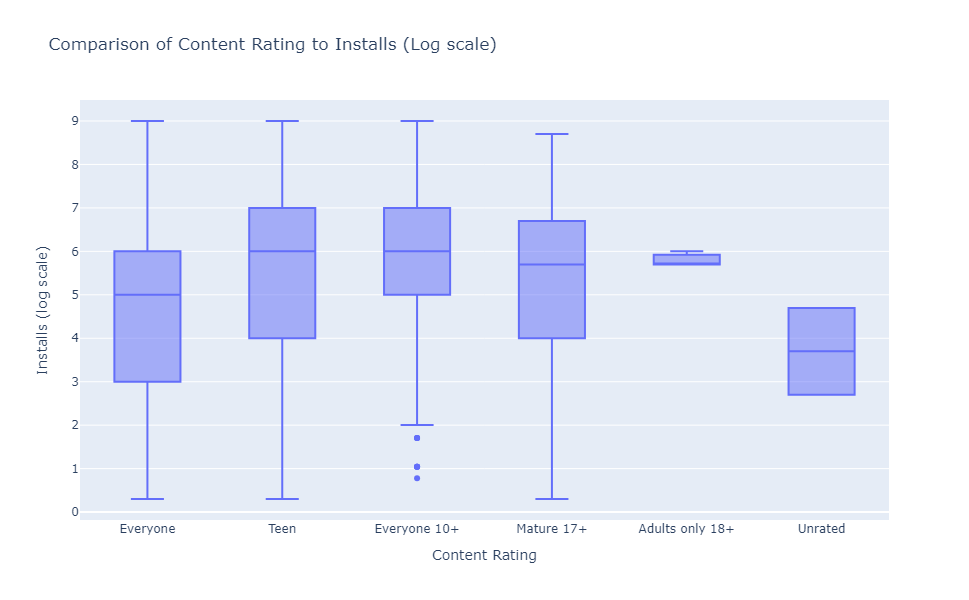

In [44]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a box plot to compare Content Rating to Installs with log scale
fig = px.box(apps, x='Content Rating', y='Installs_log',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs_log': 'Installs (log scale)', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  width=800, height=600)

# Show the plot
fig.show()


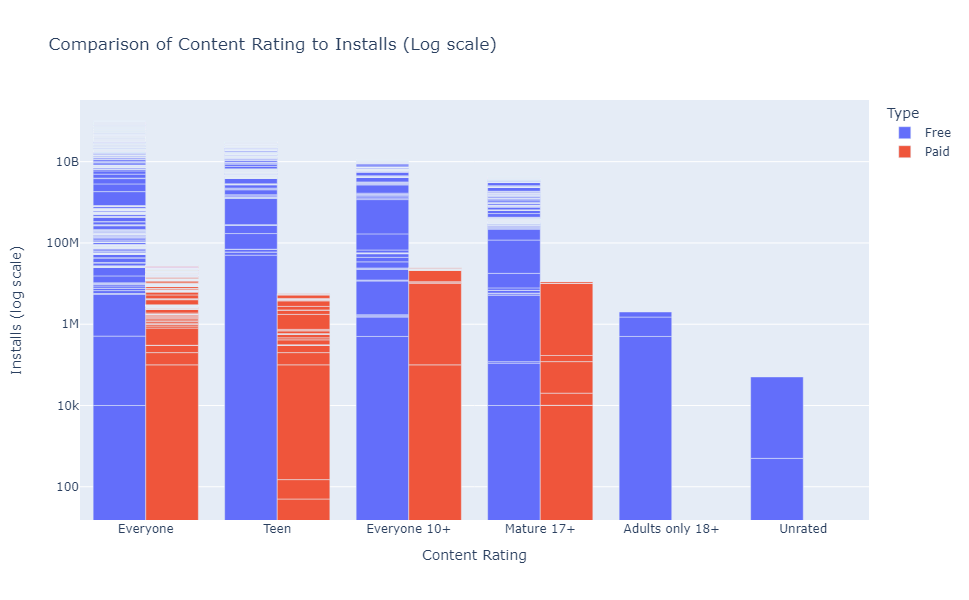

In [45]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a bar plot to compare Content Rating to Installs with log scale, separated by Type
fig = px.bar(apps, x='Content Rating', y='Installs', color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability and set y-axis to log scale
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# Show the plot
fig.show()


<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

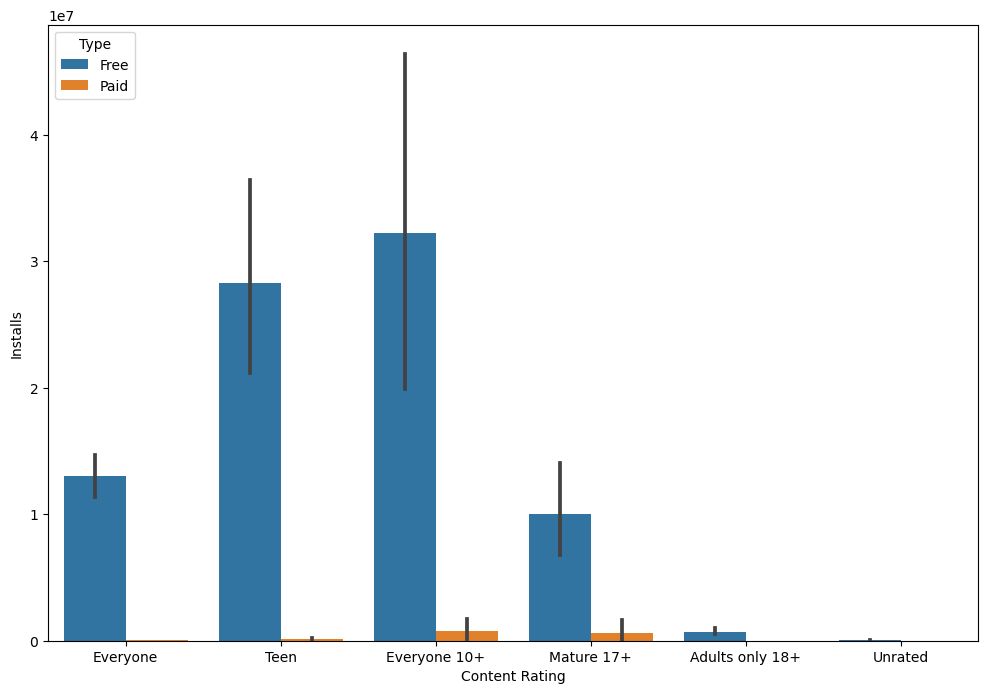

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=apps)

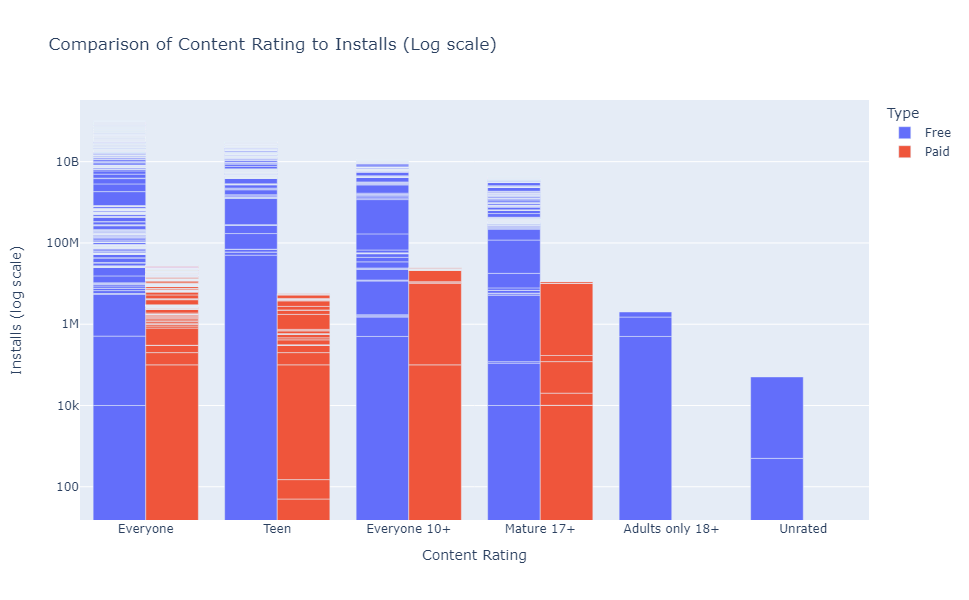

In [47]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a bar plot to compare Content Rating to Installs with log scale, separated by Type
fig = px.bar(apps, x='Content Rating', y='Installs', color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability and set y-axis to log scale
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# Show the plot
fig.show()


שלב 1: השוואת דירוגים בין קטגוריות שונות


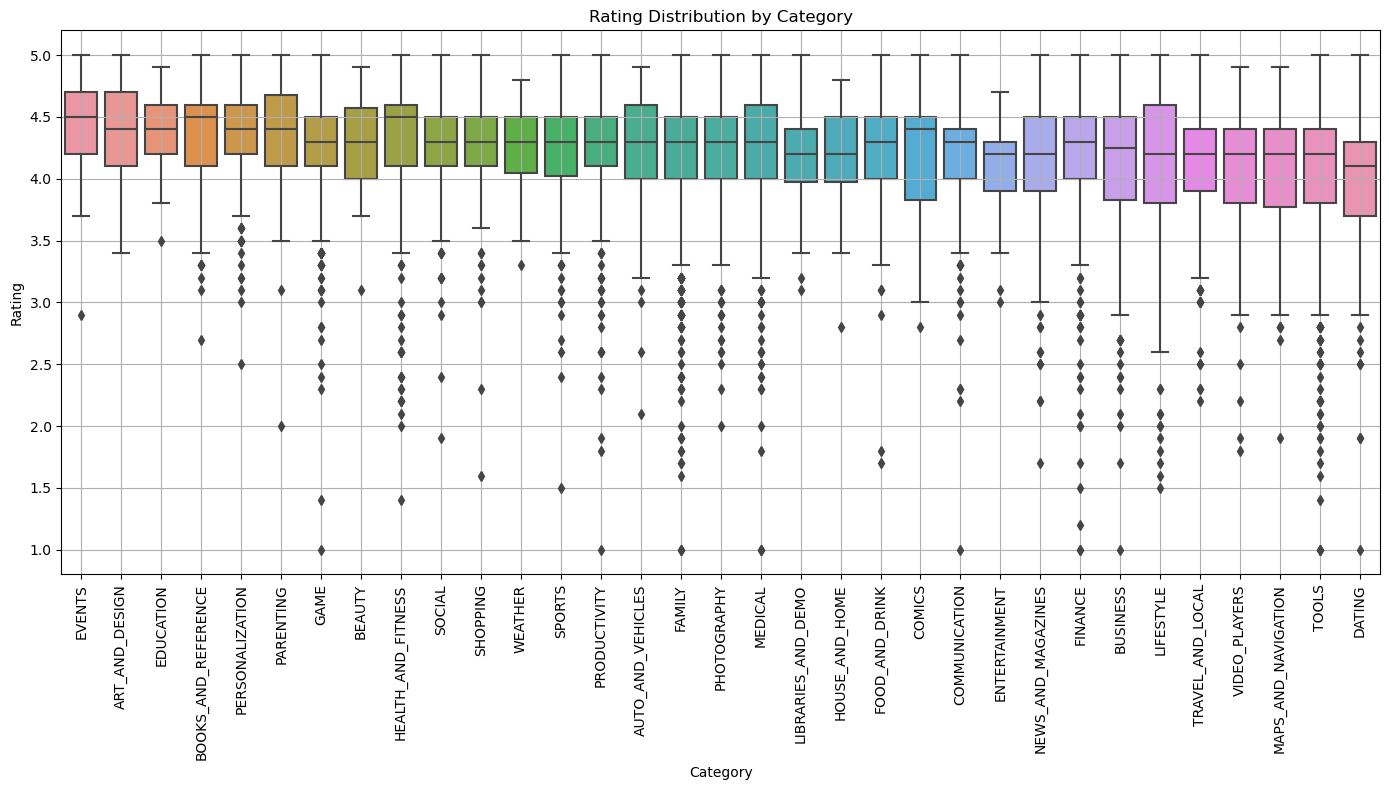

In [48]:
category_rating_means = Rating_filtered.groupby('Category')['Rating'].mean().sort_values(ascending=False).index

# השוואת דירוגים בין קטגוריות שונות
plt.figure(figsize=(14, 8))
sns.boxplot(data=Rating_filtered, x='Category', y='Rating', order=category_rating_means)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

שלב 2: השוואת גדלים בין קטגוריות שונות

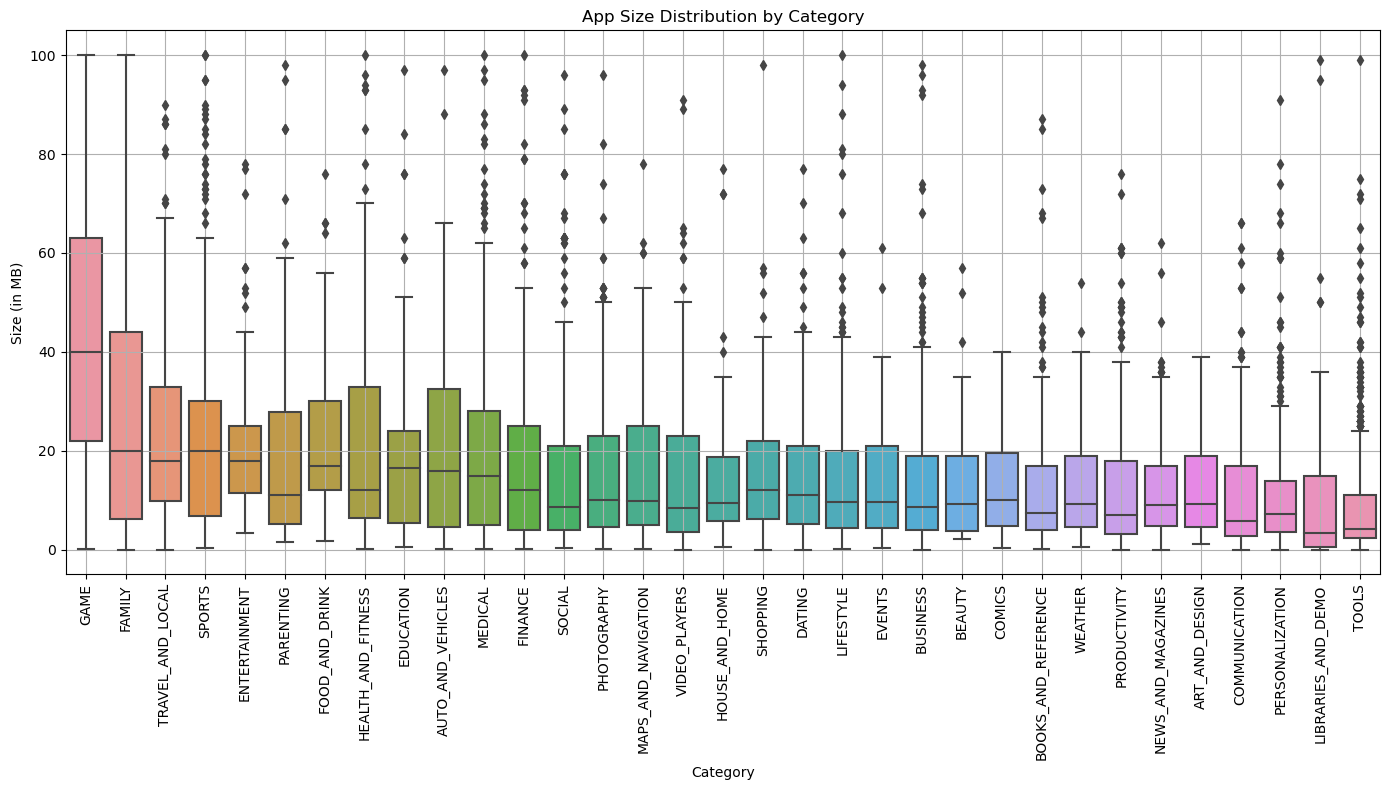

In [49]:
category_size_means = Size_MB_filtered.groupby('Category')['Size_MB'].mean().sort_values(ascending=False).index

# השוואת גדלים בין קטגוריות שונות
plt.figure(figsize=(14, 8))
sns.boxplot(data=Size_MB_filtered, x='Category', y='Size_MB', order=category_size_means)
plt.xticks(rotation=90)
plt.title('App Size Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Size (in MB)')
plt.grid(True)
plt.tight_layout()
plt.show()

שלב 3: ממוצע הדירוגים והגדלים לפי קטגוריות

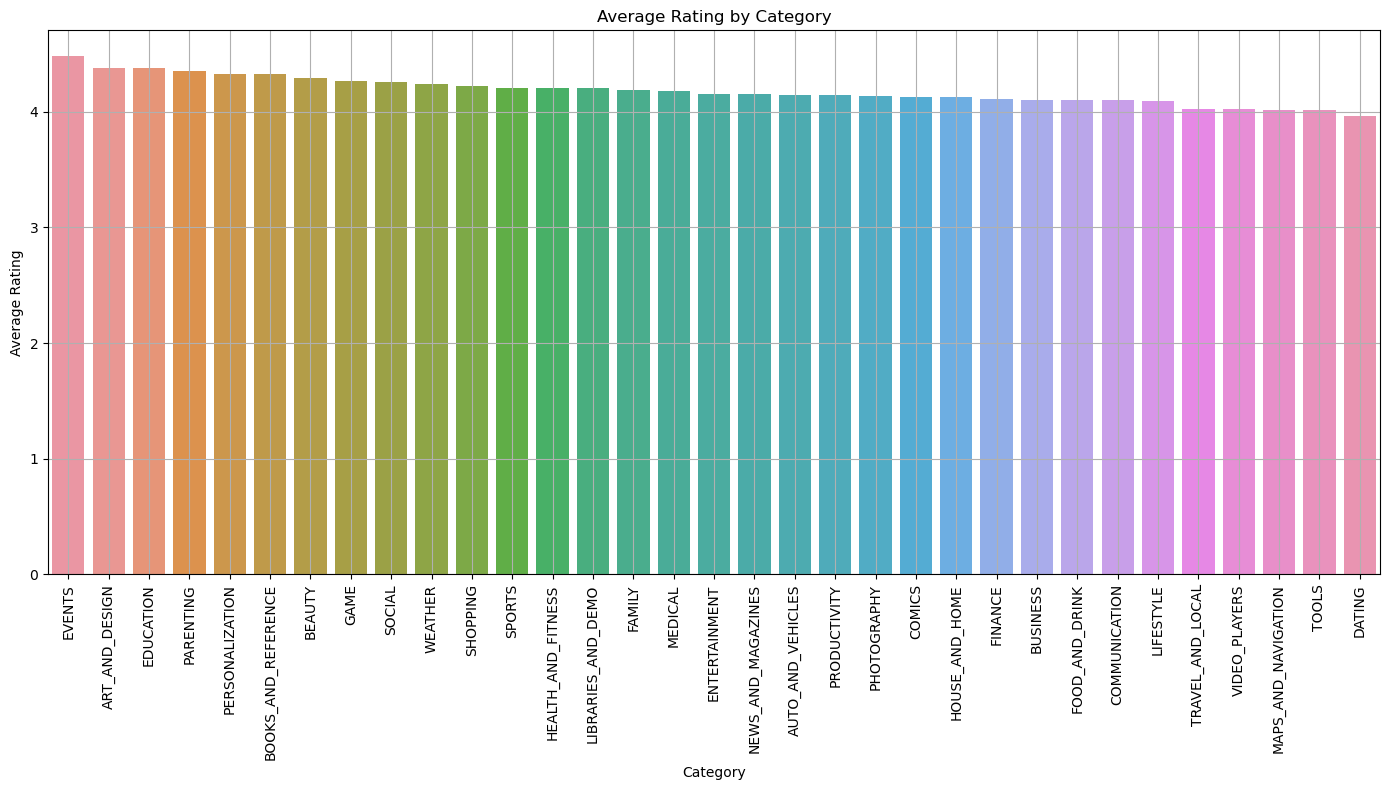

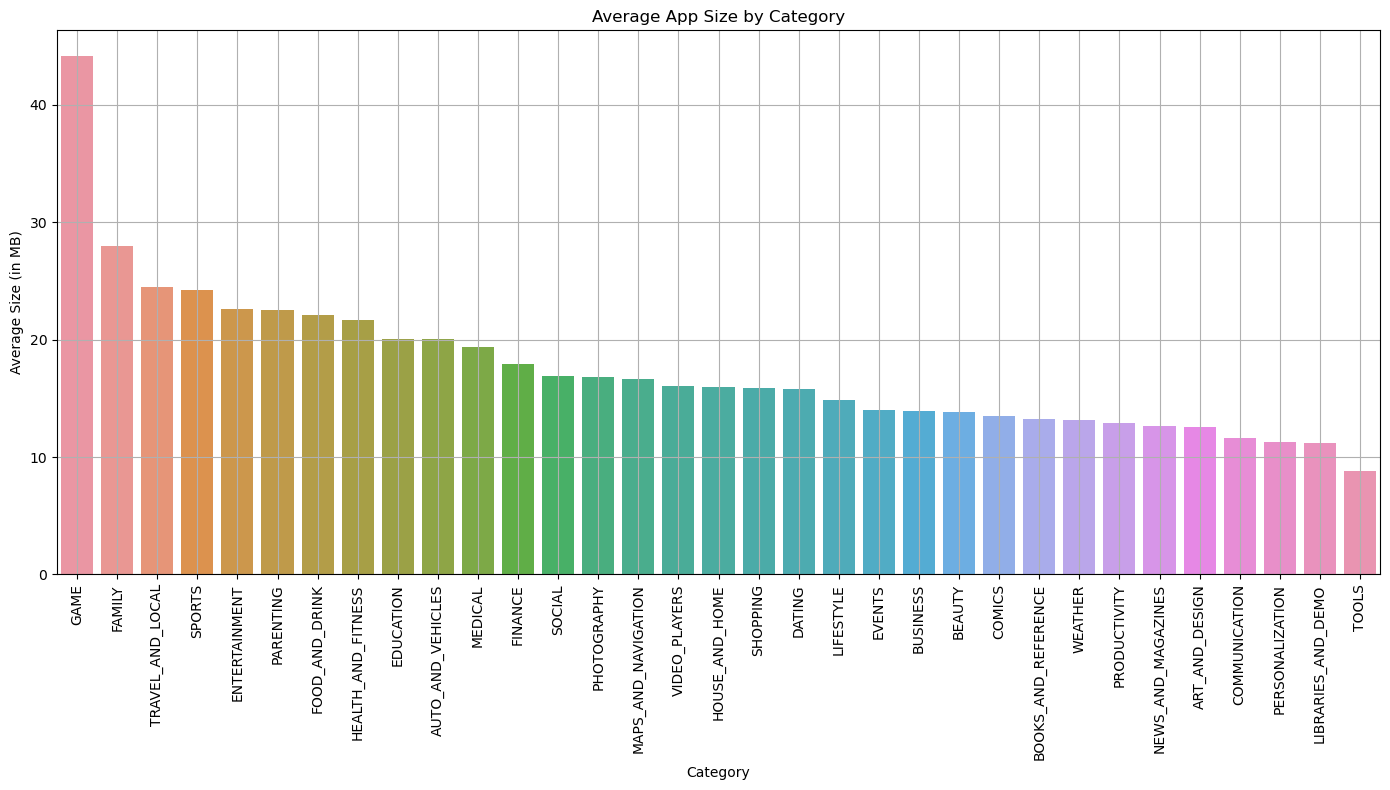

In [50]:
category_means = Size_MB_filtered.groupby('Category').agg({'Rating': 'mean', 'Size_MB': 'mean'}).reset_index()

# מיון לפי ממוצע הדירוגים
category_means_sorted_by_rating = category_means.sort_values(by='Rating', ascending=False)

# ממוצע הדירוגים לפי קטגוריות
plt.figure(figsize=(14, 8))
sns.barplot(data=category_means_sorted_by_rating, x='Category', y='Rating')
plt.xticks(rotation=90)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# מיון לפי ממוצע הגדלים
category_means_sorted_by_size = category_means.sort_values(by='Size_MB', ascending=False)

# ממוצע הגדלים לפי קטגוריות
plt.figure(figsize=(14, 8))
sns.barplot(data=category_means_sorted_by_size, x='Category', y='Size_MB')
plt.xticks(rotation=90)
plt.title('Average App Size by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (in MB)')
plt.grid(True)
plt.tight_layout()
plt.show()

שלב 4: ניתוח תת-קטגוריות

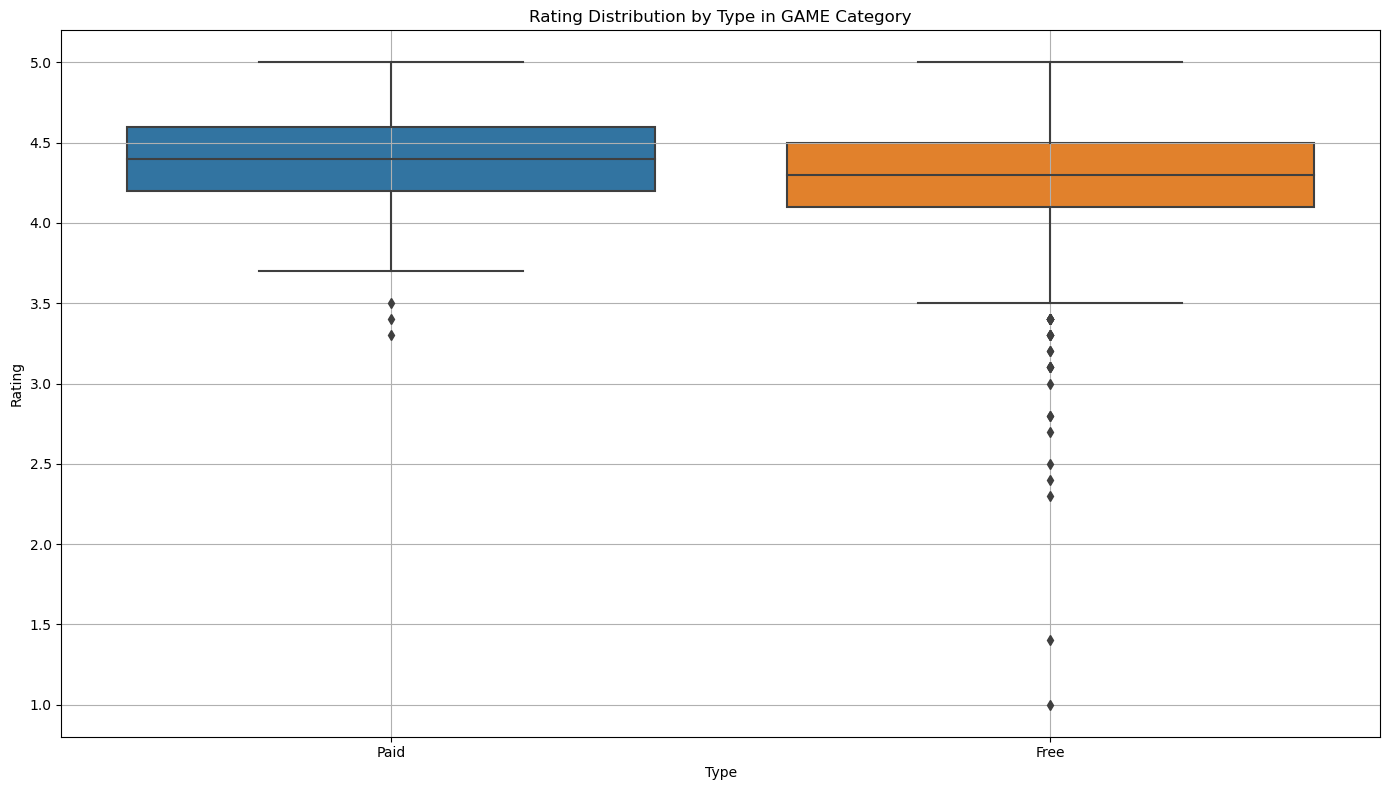

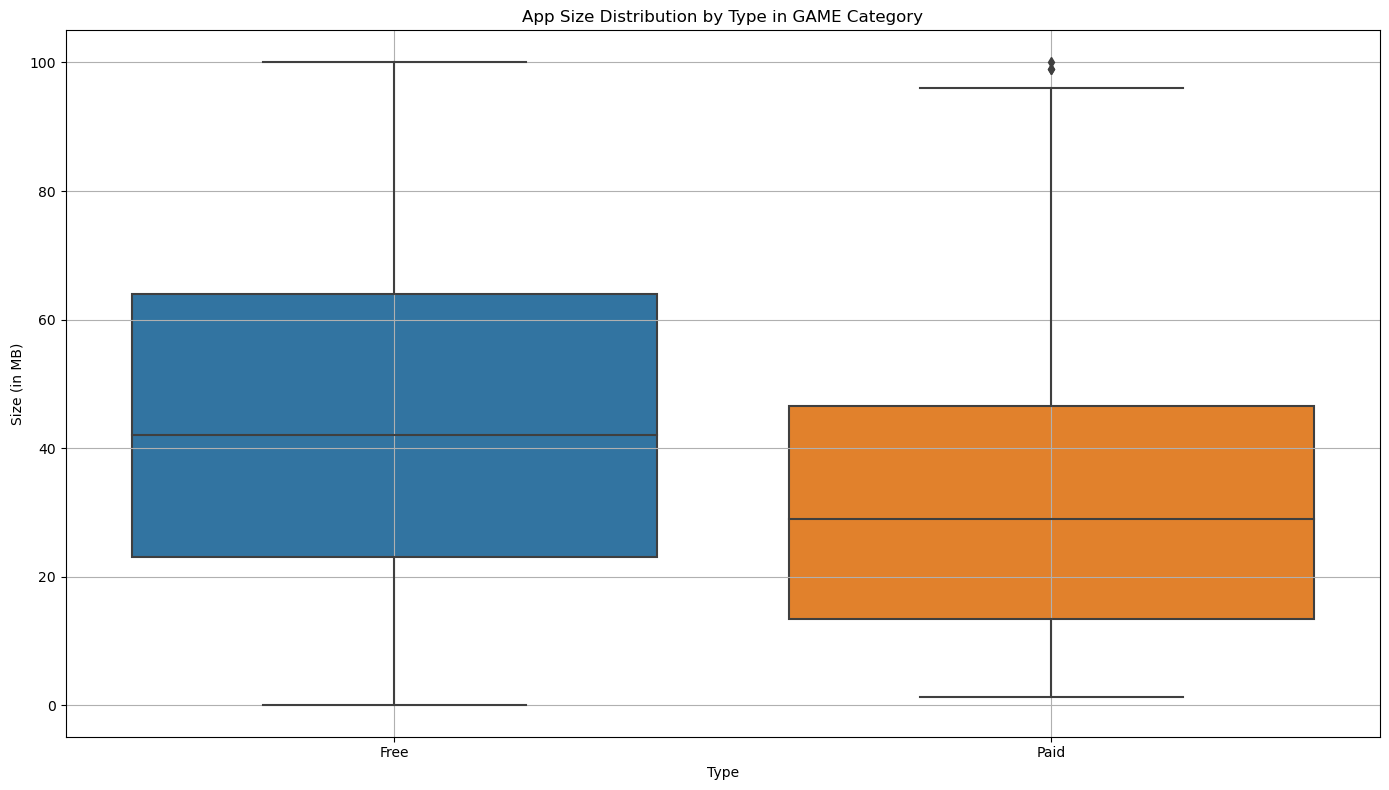

In [51]:
specific_category = 'GAME'
specific_category_data = Rating_filtered[Rating_filtered['Category'] == specific_category]

# חישוב ממוצע הדירוגים לפי סוג למיון
type_rating_means = specific_category_data.groupby('Type')['Rating'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.boxplot(data=specific_category_data, x='Type', y='Rating', order=type_rating_means)
plt.title(f'Rating Distribution by Type in {specific_category} Category')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# חישוב ממוצע הגדלים לפי סוג למיון
specific_category_size_data = Size_MB_filtered[Size_MB_filtered['Category'] == specific_category]
type_size_means = specific_category_size_data.groupby('Type')['Size_MB'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.boxplot(data=specific_category_size_data, x='Type', y='Size_MB', order=type_size_means)
plt.title(f'App Size Distribution by Type in {specific_category} Category')
plt.xlabel('Type')
plt.ylabel('Size (in MB)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
content_rating_means = apps.groupby('Content Rating').agg({
    'Rating': 'mean',
    'Reviews': 'mean',
    'Installs': 'mean'
}).reset_index()

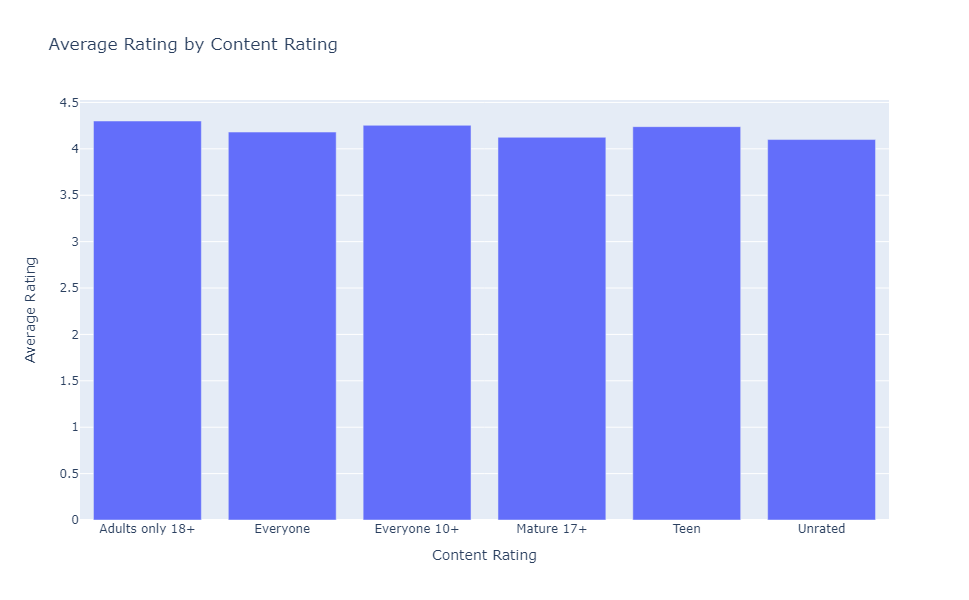

In [53]:
fig = px.bar(content_rating_means, 
             x='Content Rating', 
             y='Rating', 
             title='Average Rating by Content Rating', 
             labels={'Rating': 'Average Rating', 'Content Rating': 'Content Rating'},
             height=600)

# הצגת הגרף
fig.show()

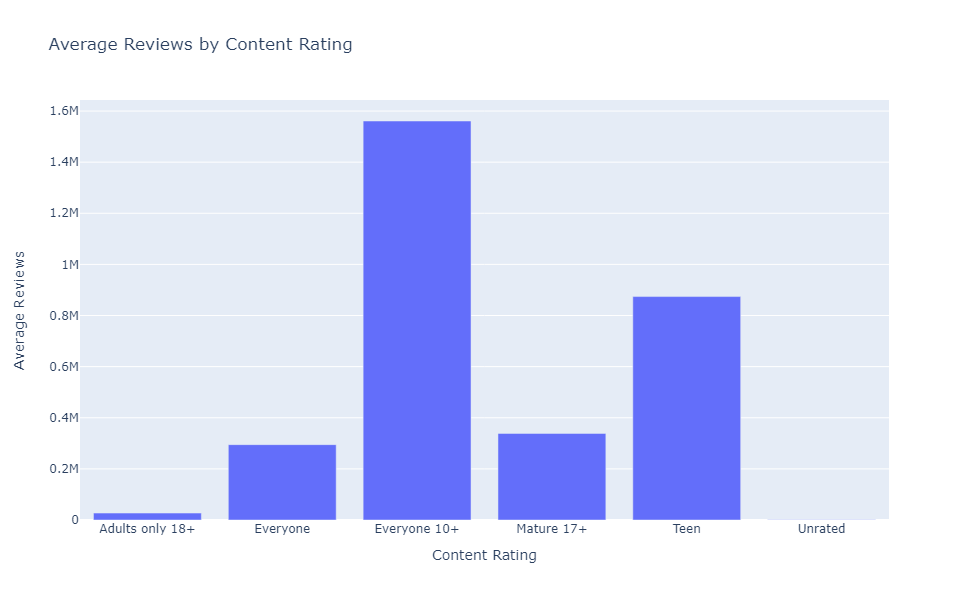

In [54]:
# ביקורות ממוצעות לפי דירוג תוכן
fig = px.bar(content_rating_means, 
             x='Content Rating', 
             y='Reviews', 
             title='Average Reviews by Content Rating', 
             labels={'Reviews': 'Average Reviews', 'Content Rating': 'Content Rating'},
             height=600)

# הצגת הגרף
fig.show()


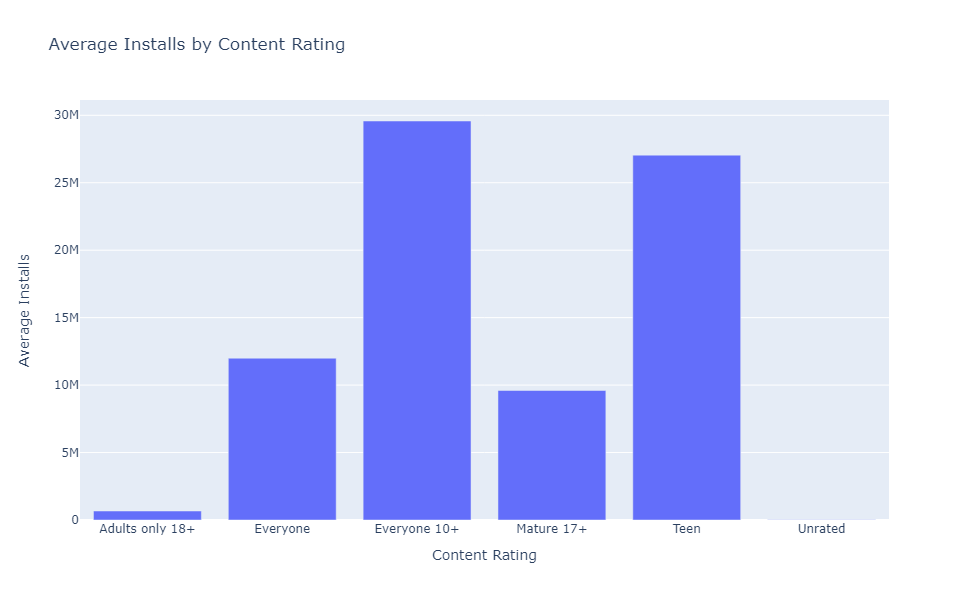

In [55]:
# התקנות ממוצעות לפי דירוג תוכן
fig = px.bar(content_rating_means, 
             x='Content Rating', 
             y='Installs', 
             title='Average Installs by Content Rating', 
             labels={'Installs': 'Average Installs', 'Content Rating': 'Content Rating'},
             height=600)

# הצגת הגרף
fig.show()
